In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Data Pre-processing: 
• Load the flight delay dataset. 
• Handle missing values. 
• Provide a statistical summary of the dataset (mean, median, mode, standard 
deviation, etc.). 
• Understand the shape and structure of the dataset (number of rows/columns, 
data types). '''

In [2]:
# 1. Loading the Dataset

# Reading the data from the flights_data excel file
data = pd.read_csv("flights_data.csv")


In [3]:
#Checking missing values across each column

# Count the number of missing values in each column
missing_counts = data.isnull().sum()

#Counting the total number of missing values in total dataset
total_missing_values=missing_counts.sum()

#Storing the total length of the data in the given dataset 
total_len=len(data)

#Checking the missing column values
print(missing_counts)


FLIGHT_NUMBER               0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
dtype: int64


In [4]:
#Calculating the percentage of missing data for each column which has missing values

#DEPARTURE_TIME missing percent
departure_time_missing_percent =(missing_counts['DEPARTURE_TIME']/total_len)*100
print('Percentage of data missing in DEPARTURE_TIME column is: ',departure_time_missing_percent)

#ARRIVAL_TIME missing percent
arrival_time_missing_percent =(missing_counts['ARRIVAL_TIME']/total_len)*100
print('Percentage of data missing in ARRIVAL_TIME column is: ',arrival_time_missing_percent)

#ARRIVAL_DELAY missing percent 
arrival_delay_missing_percent =(missing_counts['ARRIVAL_DELAY']/total_len)*100
print('Percentage of data missing in ARRIVAL_DELAY column is: ',arrival_delay_missing_percent)

#Total missing percent in dataset which has at least one column value missing
total_missing_percent_col=(total_missing_values/total_len)*100
print('Percentage of missing values in the dataset column wise is:',total_missing_percent_col)





Percentage of data missing in DEPARTURE_TIME column is:  1.4805263857046793
Percentage of data missing in ARRIVAL_TIME column is:  1.5898220319744756
Percentage of data missing in ARRIVAL_DELAY column is:  1.8056293788071962
Percentage of missing values in the dataset column wise is: 4.875977796486351


In [5]:
#Checking the missing values if any across each row 

# Get the count of rows with at least one missing value
rows_with_missing_values = data[data.isna().any(axis=1)]

# Count the number of rows with at least one missing value
count_rows_with_missing_values = len(rows_with_missing_values)

# Print the count
print("Count of rows with at least one missing value:", count_rows_with_missing_values)

#Calculating the percentage of missing data across rows 
total_missing_percent_rows=(count_rows_with_missing_values/total_len)*100
print('Percentage of missing values in the dataset row wise is: ',total_missing_percent_rows)


Count of rows with at least one missing value: 105071
Percentage of missing values in the dataset row wise is:  1.8056293788071962


In [6]:
#2. Handling the missing values

#Creating the copy of original data and handling the missing values in copied dataset 
df=data.copy()

#As the percentage of missing values is less i.e 1.8% of total data handling the missing values by dropping the rows for now in newly created copy of original dataset

#Shape of dataframe before handling missing values:
print('Shape of dataframe before handling missing values is: ',data.shape)

#Dropping rows which containing the null values 
df.dropna(inplace=True)

print('Shape of dataframe after handling missing values is: ',df.shape)


Shape of dataframe before handling missing values is:  (5819079, 12)
Shape of dataframe after handling missing values is:  (5714008, 12)


In [7]:
#Provide a statistical summary of the dataset (mean, median, mode, standard  deviation, etc.). 
#Printing the basic statistics of the dataset
print("DataSet Basic Statistics")
df.describe()

DataSet Basic Statistics


,FLIGHT_NUMBER,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
count,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06
mean,2.164384e+03,6.547799e+00,1.570759e+01,3.932643e+00,1.328907e+03,1.335066e+03,1.493187e+03,1.476373e+03,4.407057e+00
std,1.754706e+03,3.397421e+00,8.774394e+00,1.985967e+00,4.835251e+02,4.964198e+02,5.069011e+02,5.259730e+02,3.927130e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+01
25%,7.280000e+02,4.000000e+00,8.000000e+00,2.000000e+00,9.160000e+02,9.210000e+02,1.110000e+03,1.058000e+03,-1.300000e+01
50%,1.681000e+03,7.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.330000e+03,1.520000e+03,1.512000e+03,-5.000000e+00
75%,3.211000e+03,9.000000e+00,2.300000e+01,6.000000e+00,1.730000e+03,1.740000e+03,1.917000e+03,1.916000e+03,8.000000e+00
max,9.320000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,2.400000e+03,2.400000e+03,1.971000e+03


In [8]:
# Understand the shape and structure of the dataset (number of rows/columns, data types).
#Printing the shape of the dataframe to know the number of rows and columns in the datafile
print("Shape of the data is: ",df.shape)

#Printing the labels of dataframe
print(df.columns)

Shape of the data is:  (5714008, 12)
Index(['FLIGHT_NUMBER', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],
      dtype='object')


In [9]:
#Prinitng the basic information i.e number of columns and datatypes in the given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5714008 entries, 0 to 5819078
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FLIGHT_NUMBER        int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   ORIGIN_AIRPORT       object 
 6   DESTINATION_AIRPORT  object 
 7   SCHEDULED_DEPARTURE  int64  
 8   DEPARTURE_TIME       float64
 9   SCHEDULED_ARRIVAL    int64  
 10  ARRIVAL_TIME         float64
 11  ARRIVAL_DELAY        float64
dtypes: float64(3), int64(6), object(3)
memory usage: 566.7+ MB


# 2. Univariate Analysis: 
• Plot the distribution for each feature using histograms or density plots. 
• If there are categorical variables, showcase the frequency of each category using 
bar plots. 
• Describe any paterns or anomalies you observe from the univariate analysis. 

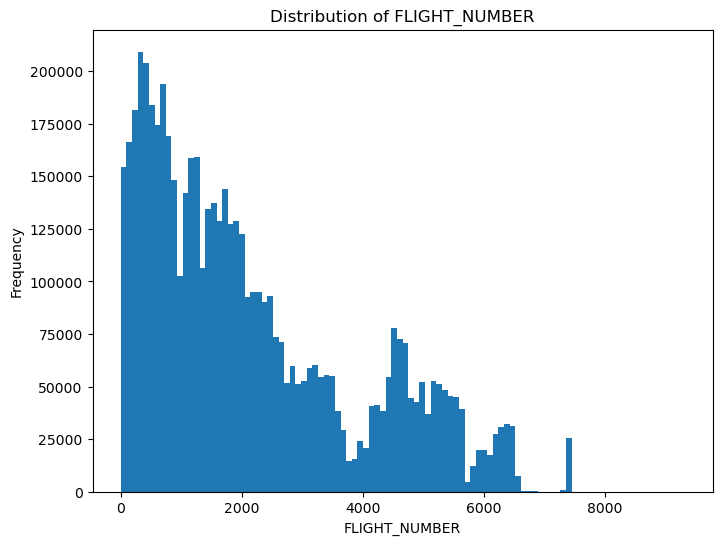

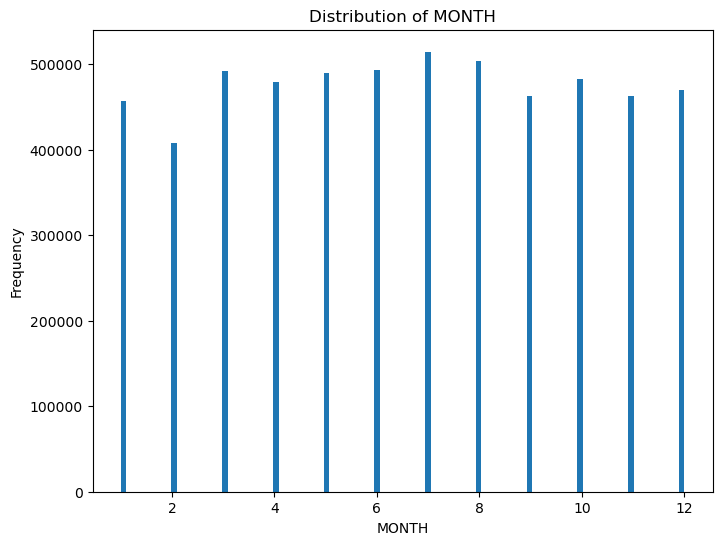

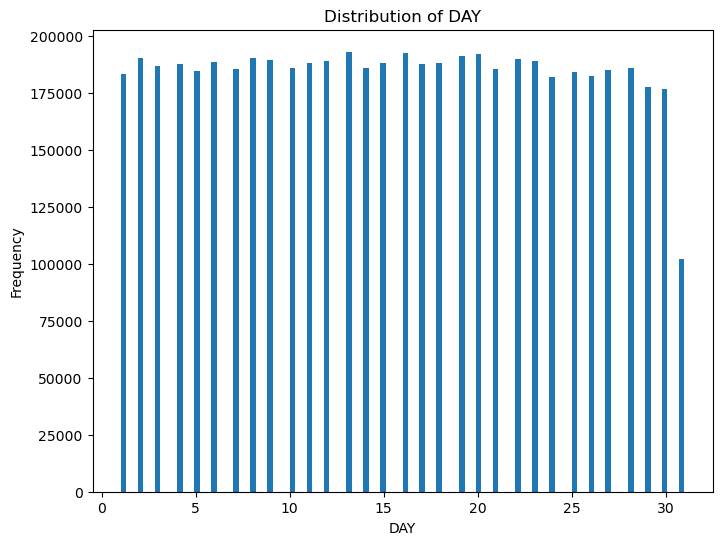

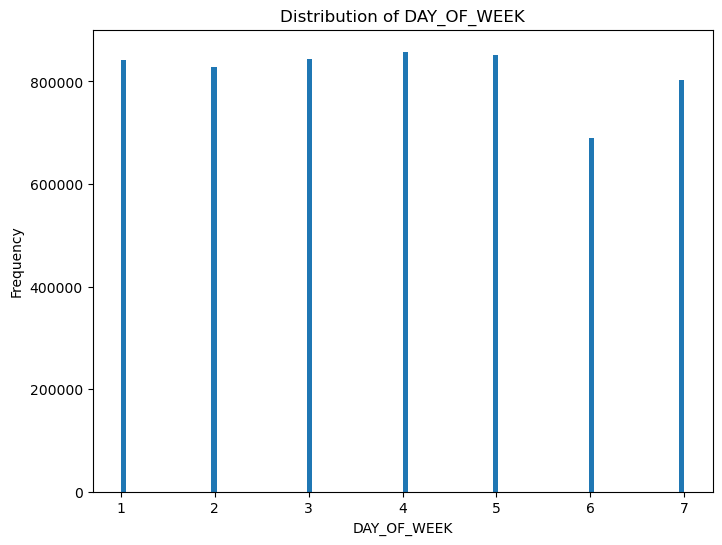

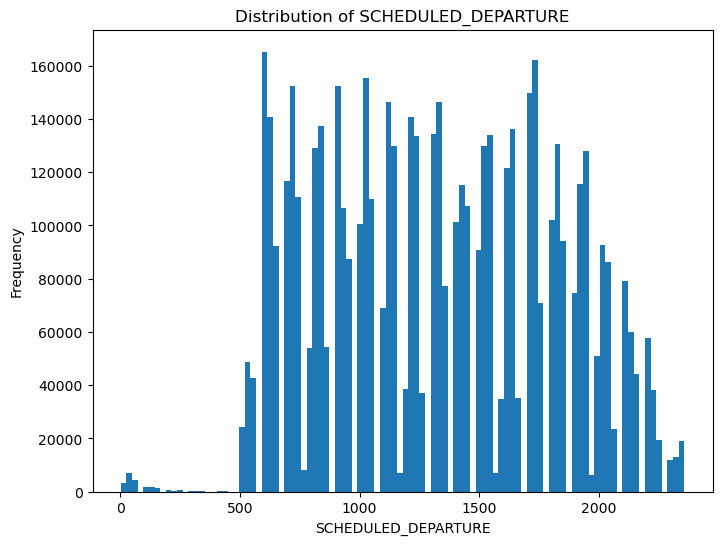

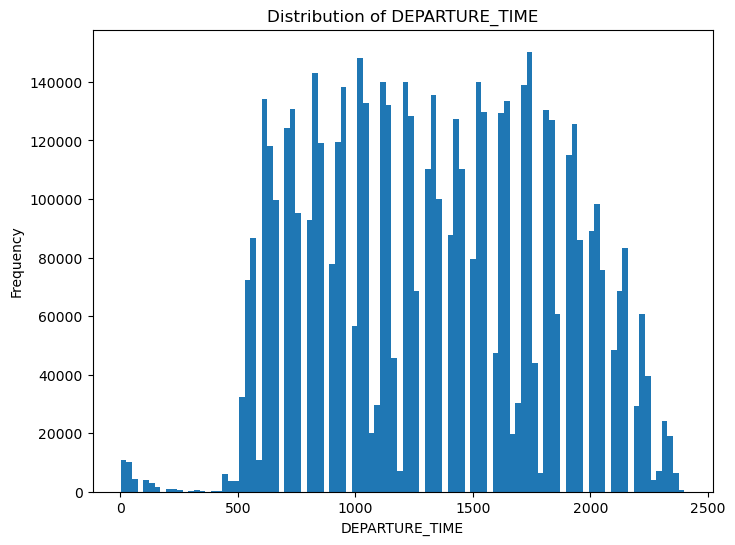

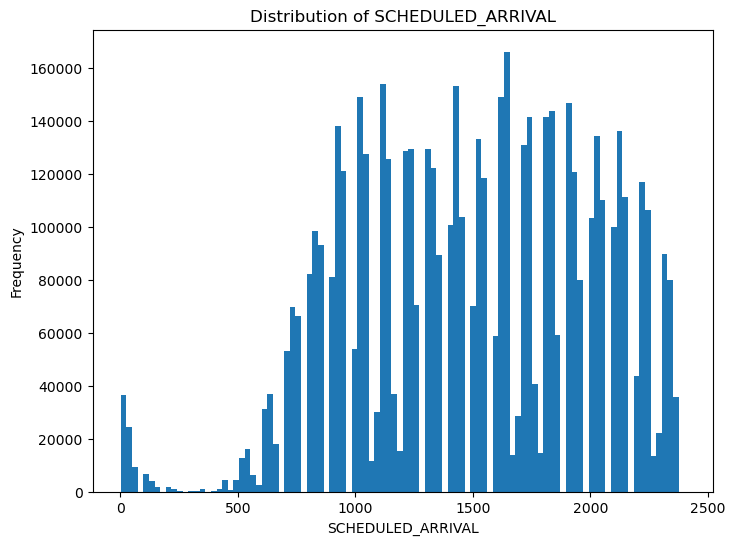

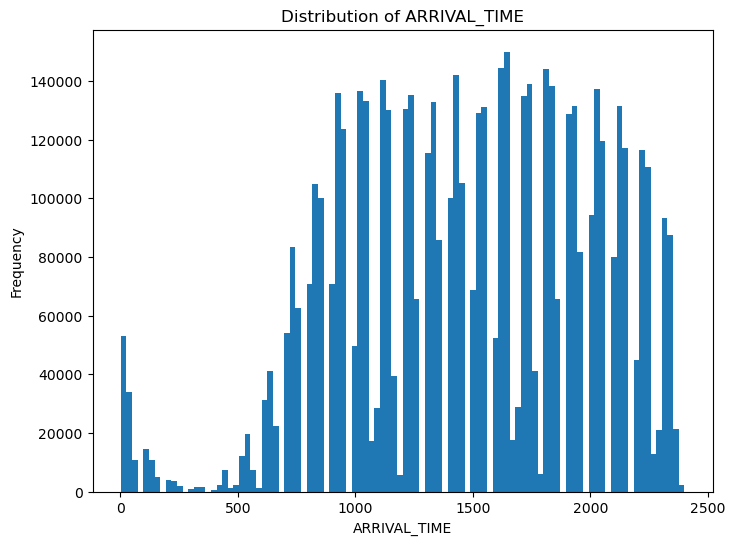

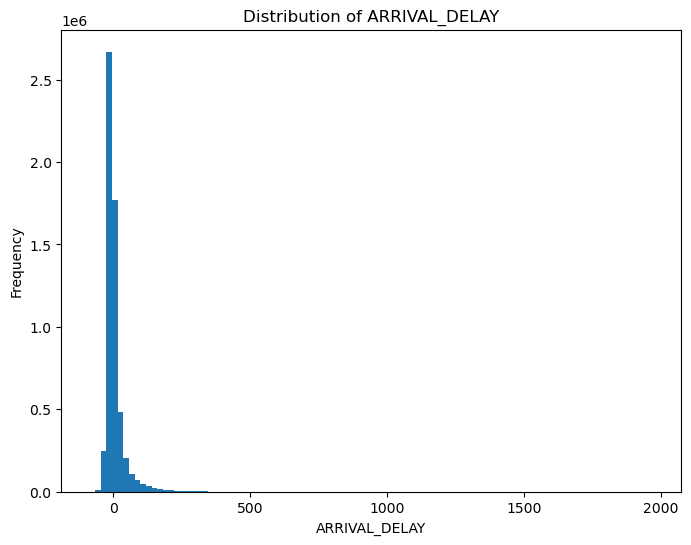

In [10]:
#Plot the distribution for each feature using histograms or density plots. 
#If there are categorical variables, showcase the frequency of each category using bar plots.
 

# Loop through each feature and create histograms
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        # Create histograms for numeric features
        plt.figure(figsize=(8, 6))
        plt.hist(df[column],bins=100)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        
#The below bar plots shows the distrubution of various features with the frequency of it in the dataset, for example if we take the month and day_of_week it shows the distrubution of those and its frequency in the datset
#From this plots we can understand and estimate on which day and which months more flights are flying and also estimate arrival delay frequency 

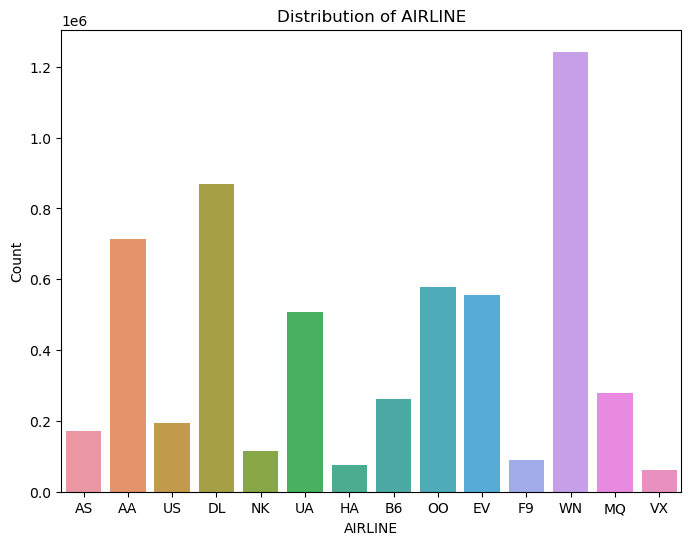

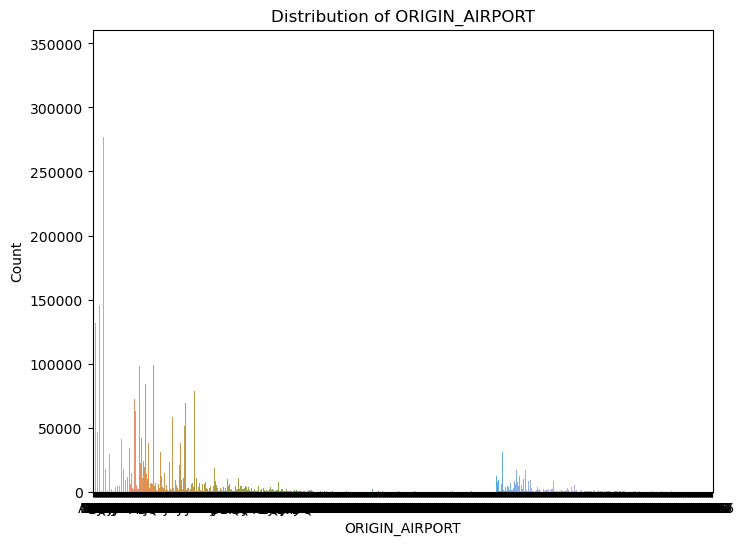

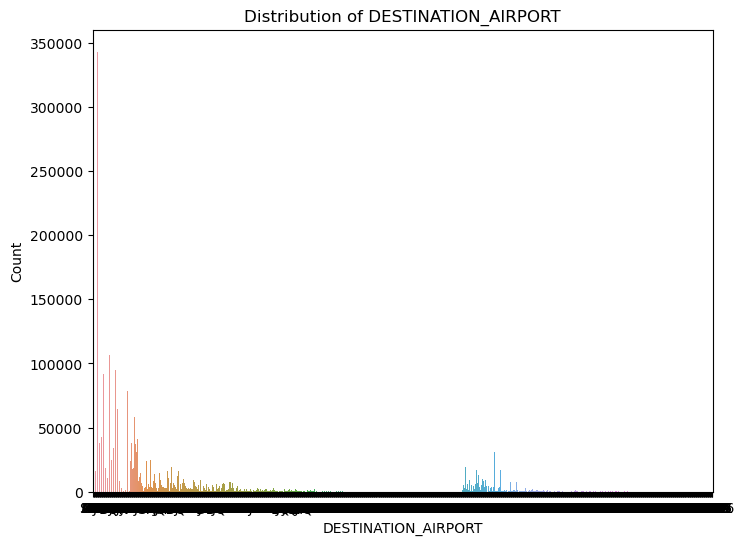

In [11]:
# Create bar plots for categorical features
for column in df.columns:
    if df[column].dtype == 'object':
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=df)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

# 3. Initial Data Exploration: 
• Check the first few rows to understand the dataset. 
• Get summary statistics for each column. 
• Identify the percentage of flights delayed by more than 15 minutes.

In [12]:
#Check the first few rows to understand the dataset. 
# Get summary statistics for each column. 
#Identify the percentage of flights delayed by more than 15 minutes.

print('Printing the first 10 rows of the dataset:')
print(df.head(10))

Printing the first 10 rows of the dataset:
   FLIGHT_NUMBER  MONTH  DAY  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT  \
0             98      1    1            4      AS            ANC   
1           2336      1    1            4      AA            LAX   
2            840      1    1            4      US            SFO   
3            258      1    1            4      AA            LAX   
4            135      1    1            4      AS            SEA   
5            806      1    1            4      DL            SFO   
6            612      1    1            4      NK            LAS   
7           2013      1    1            4      US            LAX   
8           1112      1    1            4      AA            SFO   
9           1173      1    1            4      DL            LAS   

  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  SCHEDULED_ARRIVAL  \
0                 SEA                    5          2354.0                430   
1                 PBI                   10    

In [13]:
# Get summary statistics for each column. for column in df.columns:
for column in df.columns:
    print(df[column].describe(),end=' ')
    

count    5.714008e+06
mean     2.164384e+03
std      1.754706e+03
min      1.000000e+00
25%      7.280000e+02
50%      1.681000e+03
75%      3.211000e+03
max      9.320000e+03
Name: FLIGHT_NUMBER, dtype: float64 count    5.714008e+06
mean     6.547799e+00
std      3.397421e+00
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      9.000000e+00
max      1.200000e+01
Name: MONTH, dtype: float64 count    5.714008e+06
mean     1.570759e+01
std      8.774394e+00
min      1.000000e+00
25%      8.000000e+00
50%      1.600000e+01
75%      2.300000e+01
max      3.100000e+01
Name: DAY, dtype: float64 count    5.714008e+06
mean     3.932643e+00
std      1.985967e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      7.000000e+00
Name: DAY_OF_WEEK, dtype: float64 count     5714008
unique         14
top            WN
freq      1242403
Name: AIRLINE, dtype: object count     5714008
unique        929
top           ATL
freq       343506

In [14]:
# For this analysis, we will drop rows with missing values related to delays.

#Using the dataframe df in which the missing values are handled earlier for the calculation 

# Identify flights delayed by more than 15 minutes
delayed_flights = df[df['ARRIVAL_DELAY'] > 15]

#print(delayed_flights)

# Calculate the percentage of delayed flights
total_flights = len(df)
delayed_percentage = (len(delayed_flights) / total_flights) * 100

# Print the result
print(f"Percentage of flights delayed by more than 15 minutes: {delayed_percentage:.2f}%")


Percentage of flights delayed by more than 15 minutes: 17.91%


# 4  Visual Analysis: 
• Visualize the distribution of flight delays.  
• Compare average delays across different airlines.
• Investigate the impact of the day of the week on delays. 
• Analyze if there's any patern of delays based on the scheduled departure hour. 
• Understand the correlation between the various numeric variables. 
• Check if there's any seasonality in delays.

0     -22.0
1      -9.0
2       5.0
3      -9.0
4     -21.0
       ... 
100    -3.0
101     0.0
102    78.0
103   -16.0
104   -21.0
Name: ARRIVAL_DELAY, Length: 100, dtype: float64


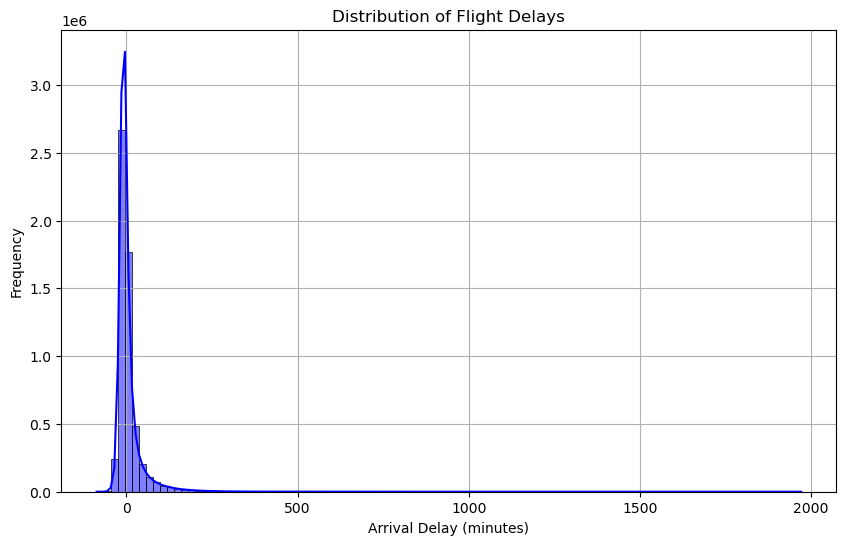

In [15]:
# Visualize the distribution of flight delays.

# Extract arrival delays
arrival_delays = df['ARRIVAL_DELAY']

print(arrival_delays.head(100))

# Create a histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(arrival_delays, bins=100, kde=True, color='blue')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Delays')
plt.grid(True)
plt.show()


   AIRLINE  ARRIVAL_DELAY
0       AA       3.451372
1       AS      -0.976563
2       B6       6.677861
3       DL       0.186754
4       EV       6.585379
5       F9      12.504706
6       HA       2.023093
7       MQ       6.457873
8       NK      14.471800
9       OO       5.845652
10      UA       5.431594
11      US       3.706209
12      VX       4.737706
13      WN       4.374964


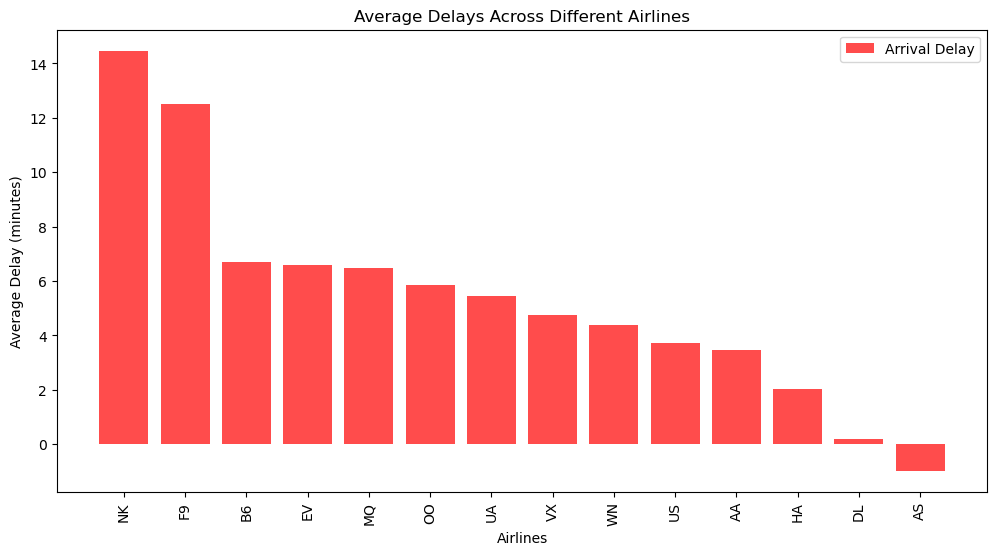

In [16]:
#Using the Arrival delay to compare the average depature and arrival delays of different airlines

# Group the data by airline and calculate the average departure and arrival delays and reset the index for the resulting DataFrame
average_delays_across_airline = df.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().reset_index()

# Print the average delays for each airline
print(average_delays_across_airline)
average_delays_across_airline=average_delays_across_airline.sort_values(by='ARRIVAL_DELAY',ascending=False)

# Create a bar chart to compare average delays
plt.figure(figsize=(12, 6))
plt.bar(average_delays_across_airline['AIRLINE'], average_delays_across_airline['ARRIVAL_DELAY'], label='Arrival Delay', alpha=0.7,color='Red')
plt.xlabel('Airlines')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delays Across Different Airlines')
plt.xticks(rotation=90)  # Rotate airline labels for better readability
plt.legend()
plt.show()



   DAY_OF_WEEK  ARRIVAL_DELAY
0            1       6.002063
1            2       4.246041
2            3       3.845468
3            4       5.668334
4            5       4.764079
5            6       1.852892
6            7       3.958293


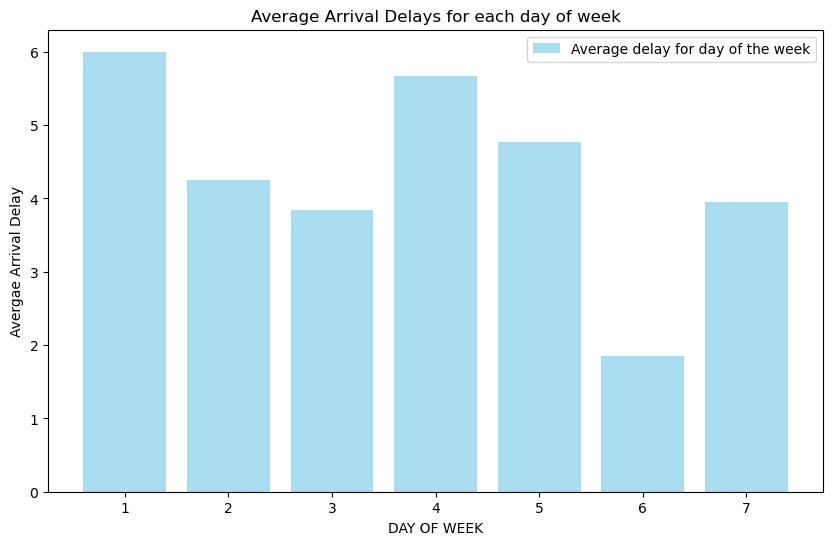

In [17]:
#Investigate the impact of the day of the week on delays

impact_of_day_on_arrivalDelay=df.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].mean().reset_index()
print(impact_of_day_on_arrivalDelay)

#Create a bar plot to visualize the impact of the day of the week on delays 
plt.figure(figsize=(10,6))
plt.bar(impact_of_day_on_arrivalDelay['DAY_OF_WEEK'],impact_of_day_on_arrivalDelay['ARRIVAL_DELAY'],label='Average delay for day of the week', alpha=0.7,color='skyblue')
plt.xlabel('DAY OF WEEK')
plt.ylabel('Avergae Arrival Delay')
plt.title('Average Arrival Delays for each day of week')
plt.legend()
plt.show()



    SCHEDULED_DEPARTURE_HOUR  ARRIVAL_DELAY
24                        24      84.000000
21                        21       9.641143
3                          3       9.461538
19                        19       9.223450
20                        20       9.200236
22                        22       9.149009
23                        23       8.986256
0                          0       8.502112
18                        18       8.244028
1                          1       7.089880
17                        17       6.968987
16                        16       5.428291
2                          2       4.055300
15                        15       3.996444
14                        14       3.094479
13                        13       2.445081
5                          5       1.537412
12                        12       1.471718
4                          4       1.314398
11                        11       0.540663
10                        10      -0.175949
6                          6    

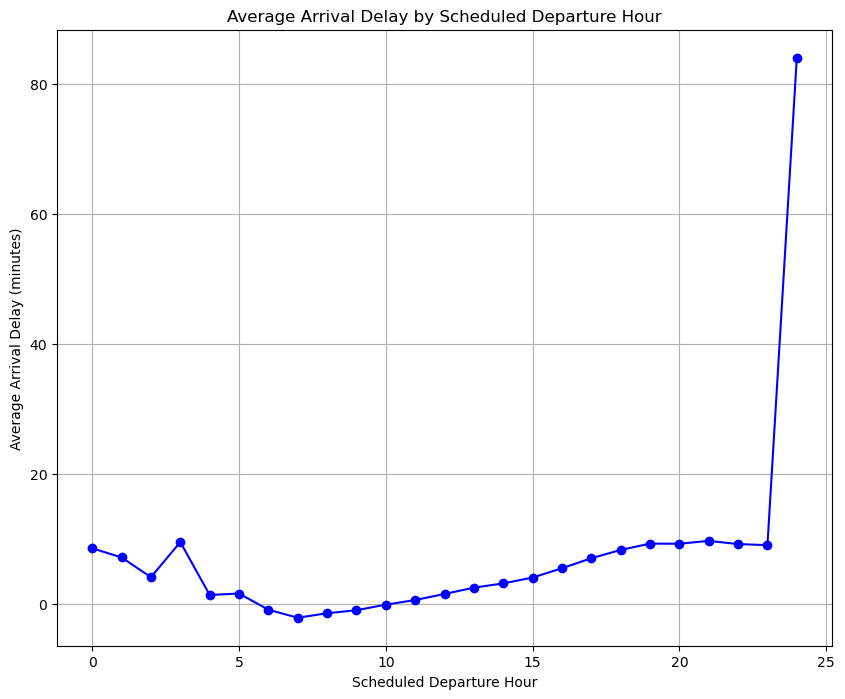

In [18]:
#Analyze if there's any patern of delays based on the scheduled departure hour.

#Converting Schedule_Arrival time to hours 

df['SCHEDULED_DEPARTURE_HOUR']=df['SCHEDULED_ARRIVAL']//100
# Calculate the average departure delay for each scheduled departure hour
average_delay_by_hour = df.groupby('SCHEDULED_DEPARTURE_HOUR')['ARRIVAL_DELAY'].mean().reset_index()


#Sorting the datafrme based on the average delay in descending order 
high_average_delay_by_depthour=average_delay_by_hour.sort_values(by='ARRIVAL_DELAY',ascending=False)
print(high_average_delay_by_depthour)

# Create a line plot to visualize the pattern of delays
plt.figure(figsize=(10,8))
plt.plot(average_delay_by_hour['SCHEDULED_DEPARTURE_HOUR'],average_delay_by_hour['ARRIVAL_DELAY'] ,marker='o', linestyle='-', color='b')
plt.xlabel('Scheduled Departure Hour')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Scheduled Departure Hour')
plt.grid(True)

plt.show()



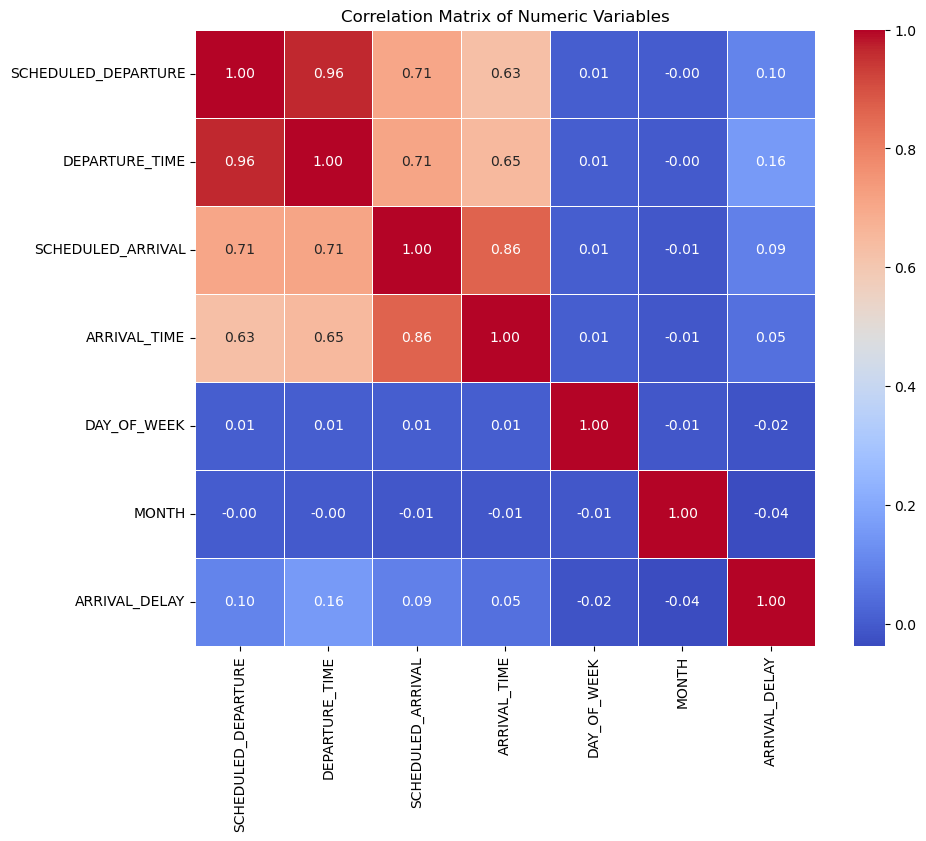

In [19]:
# Understand the correlation between the various numeric variables.

# Select the numeric variables you want to analyze
numeric_columns = ['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME','DAY_OF_WEEK','MONTH','ARRIVAL_DELAY']

# Create a DataFrame with only the selected numeric variables
numeric_data = df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


    MONTH  ARRIVAL_DELAY
0       1       5.813583
1       2       8.320500
2       3       4.920673
3       4       3.163190
4       5       4.485019
5       6       9.601590
6       7       6.431775
7       8       4.607372
8       9      -0.772571
9      10      -0.780390
10     11       1.100784
11     12       6.092903


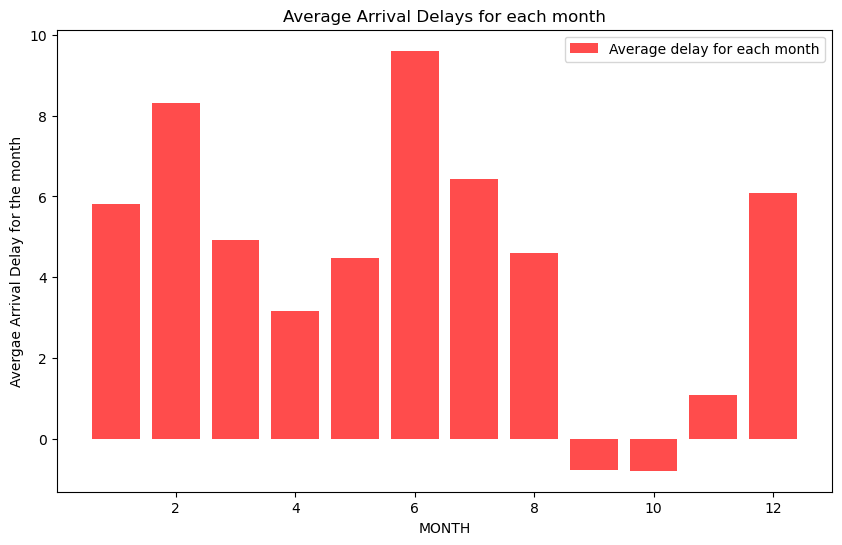

In [20]:
#Check if there's any seasonality in delays.

month_based_delay=df.groupby('MONTH')['ARRIVAL_DELAY'].mean().reset_index()
print(month_based_delay)

#Create a bar plot to visualize the montly based delays 
plt.figure(figsize=(10,6))
plt.bar(month_based_delay['MONTH'],month_based_delay['ARRIVAL_DELAY'],label='Average delay for each month', alpha=0.7,color='red')
plt.xlabel('MONTH')
plt.ylabel('Avergae Arrival Delay for the month')
plt.title('Average Arrival Delays for each month')
plt.legend()
plt.show()


# 5. Deep Dive Analysis: 
• Identify the origin-destination pairs with the highest average delays. 
• Analyze the 10 most frequent flight routes and their average delays. 
• Visualize the relationship between the origin and destination airports using a 
heatmap.


In [21]:
# Group the data by origin and destination airports and calculate the average arrival delay
average_delays = df.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])['ARRIVAL_DELAY'].mean().reset_index()

highest_average_delays = average_delays.sort_values(by='ARRIVAL_DELAY', ascending=False)

# Print the top N origin-destination pairs with the highest average delays
N = 100  # You can change N to view more or fewer top pairs
print(f"Top {N} Origin-Destination Pairs with Highest Average Delays:")
print(highest_average_delays.head(N))

Top 100 Origin-Destination Pairs with Highest Average Delays:
      ORIGIN_AIRPORT DESTINATION_AIRPORT  ARRIVAL_DELAY
9658             IAD                 TTN     381.000000
7398           14869               13264     268.000000
12153            SWF                 PBI     260.500000
5988           13158               11298     248.000000
11495            RIC                 CAE     228.000000
...              ...                 ...            ...
6452           13796               12266      74.000000
7302           14814               11292      74.000000
4887           11298               10728      73.750000
7600           15304               14683      73.500000
4347           10781               12266      73.307692

[100 rows x 3 columns]


In [22]:
# Create a new column representing the flight route by concatenating origin and destination airports
df['FLIGHT_ROUTE'] = df['ORIGIN_AIRPORT']+df['DESTINATION_AIRPORT']

# Calculate the frequency of each flight route
route_frequencies = df['FLIGHT_ROUTE'].value_counts().reset_index()
route_frequencies.columns = ['FLIGHT_ROUTE', 'FREQUENCY']

# Calculate the average arrival delay for each flight route
average_delays = df.groupby('FLIGHT_ROUTE')['ARRIVAL_DELAY'].mean().reset_index()
average_delays.columns = ['FLIGHT_ROUTE', 'AVERAGE_DELAY']

# Merge the frequency and average delay data
top_routes = route_frequencies.merge(average_delays, on='FLIGHT_ROUTE')

# Sort the results by frequency in descending order
top_routes = top_routes.sort_values(by='FREQUENCY', ascending=False)

# Display the top 10 most frequent flight routes and their average delays
top_10_routes = top_routes.head(10)
print("Top 10 Most Frequent Flight Routes and Their Average Delays:")
print(top_10_routes)


Top 10 Most Frequent Flight Routes and Their Average Delays:
  FLIGHT_ROUTE  FREQUENCY  AVERAGE_DELAY
0       SFOLAX      13400      11.440000
1       LAXSFO      13109      10.739187
2       JFKLAX      11853      -2.671560
3       LAXJFK      11851       0.613872
4       LASLAX       9651      11.974614
5       LAXLAS       9522       8.655535
6       LGAORD       9179       3.765552
7       ORDLGA       9101      10.287331
8       SFOJFK       8306       2.141464
9       JFKSFO       8301      -0.554993


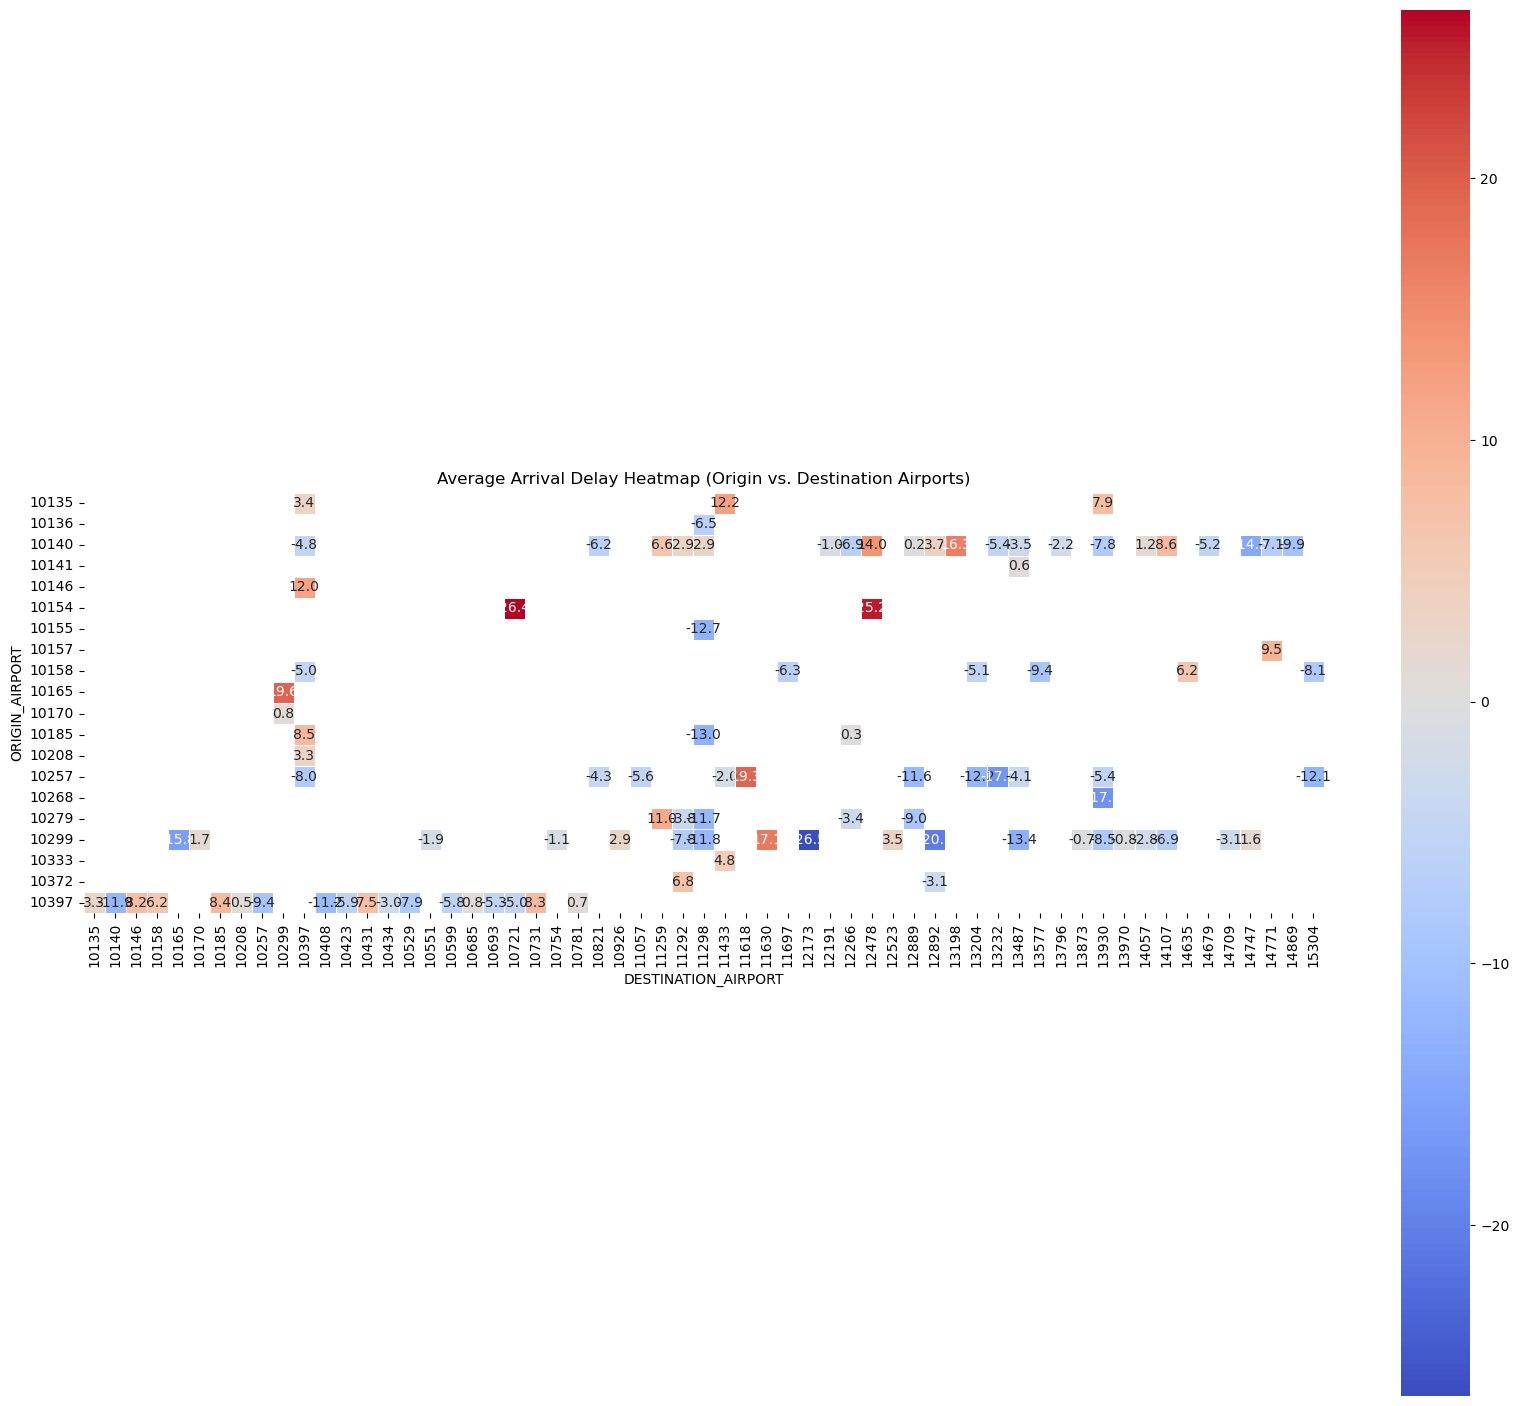

In [23]:
# Calculate the average arrival delay for each airport pair 
airport_pair_delays = df.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])['ARRIVAL_DELAY'].mean().reset_index()

#Taking the first 100 from dataframe for plotting heapmap
airport_pair_delays_100=airport_pair_delays.head(100)

# Create a pivot table or matrix-like structure for the heatmap
heatmap_data = airport_pair_delays_100.pivot_table(index='ORIGIN_AIRPORT', columns='DESTINATION_AIRPORT', values='ARRIVAL_DELAY', aggfunc='mean')

# Create a heatmap using seaborn 
plt.figure(figsize=(20, 18))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.5, square=True)
plt.title('Average Arrival Delay Heatmap (Origin vs. Destination Airports)')
plt.show()


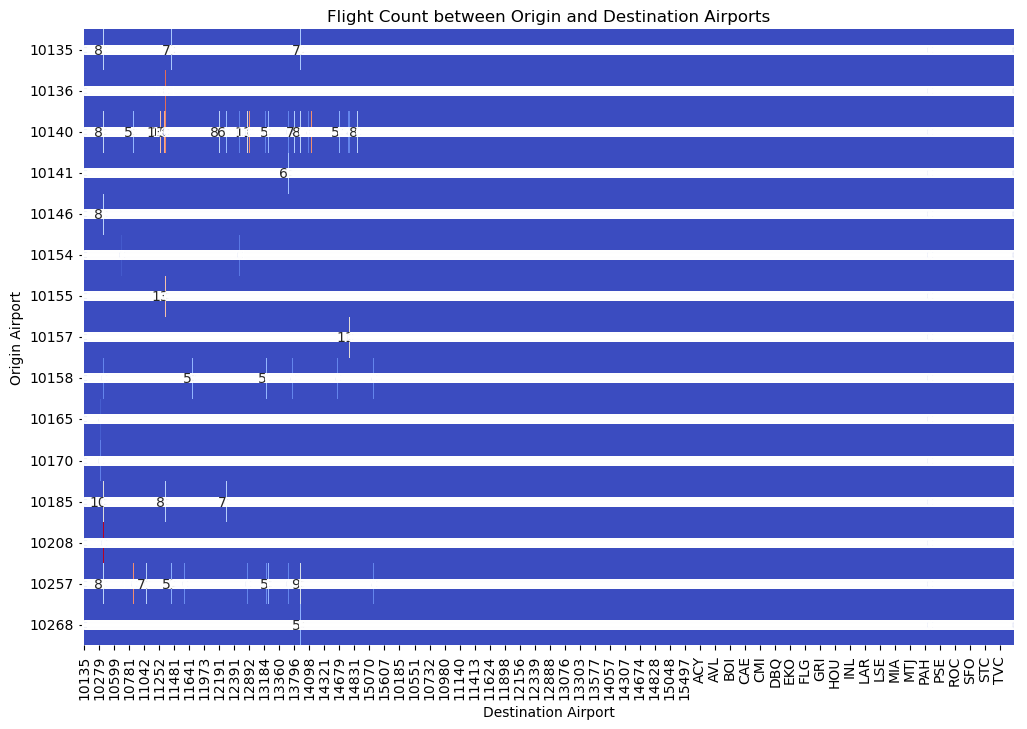

In [24]:
flight_counts = df.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']).size().unstack(fill_value=0)

flight_15=flight_counts.head(15)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(flight_15, cmap='coolwarm', annot=True, fmt="d", cbar=False)
plt.title('Flight Count between Origin and Destination Airports')
plt.xlabel('Destination Airport')
plt.ylabel('Origin Airport')
plt.show()


# 7. Bonus Task (for advanced students): 
• Use a simple linear regression model to predict flight delays based on the 
features in the dataset. Evaluate the performance of your model. 
• Apply feature engineering to improve the model's performance. 

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load your dataset into a DataFrame
# Preprocess your data (select relevant columns, handle missing data, encode categorical variables, etc.)

# Split the data into training and testing sets
X = df[["MONTH", "DAY_OF_WEEK", "SCHEDULED_DEPARTURE", "SCHEDULED_ARRIVAL",]]
y = df["ARRIVAL_DELAY"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 20.968295094866875
Mean Squared Error: 1516.0541254440732
Root Mean Squared Error: 38.93653972098796
R-squared: 0.012370639477830458
